In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
Here is the dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 


In [2]:
#read the dataset through head method

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data.head()


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
data.shape

(1000, 40)

In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['fraud_reported'] = LE.fit_transform(data['fraud_reported'])


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#we will drop few features which does not help for any prediction

data.drop('policy_number',axis=1,inplace=True) #drop unnecessary feature
data.drop('policy_bind_date',axis=1,inplace=True) #drop unnecessary feature
data.drop('insured_zip',axis=1,inplace=True) #drop unnecessary feature
data.drop('auto_year',axis=1,inplace=True) #drop unnecessary feature
data.drop('auto_make',axis=1,inplace=True) #drop unnecessary feature
data.drop('insured_hobbies',axis=1,inplace=True) #drop unnecessary feature
data.drop('_c39',axis=1,inplace=True) #drop unnecessary feature
data.drop('incident_location',axis=1,inplace=True) #drop unnecessary feature
data.drop('incident_state',axis=1,inplace=True) #drop unnecessary feature
data.drop('insured_education_level',axis=1,inplace=True) #drop unnecessary feature
data.drop('insured_occupation',axis=1,inplace=True) #drop unnecessary feature


In [8]:
data.shape

(1000, 29)

In [9]:
data.isna().sum() #we have treated all the nulls

months_as_customer              0
age                             0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_city                   0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_model                      0
fraud_reported                  0
dtype: int64

In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns


Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_city', 'property_damage',
       'police_report_available', 'auto_model'],
      dtype='object')

In [11]:
data.authorities_contacted = data.authorities_contacted.fillna('none')


In [12]:
#generating dummy values on the given dataset
data= pd.get_dummies(data).astype(int)
data.head()


months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                   1406   
1                 228   42               2000                   1197   
2                 134   29               2000                   1413   
3                 256   41               2000                   1415   
4                 228   44               1000                   1583   

   umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0               0          53300             0                         5   
1         5000000              0             0                         8   
2         5000000          35100             0                         7   
3         6000000          48900        -62400                         5   
4         6000000          66000        -46000                        20   

   number_of_vehicles_involved  bodily_injuries  ...  auto_model_Pathfinder  \
0                            1                1  ...                      0   
1                            1                0  ...                      0   
2                            3                2  ...                      0   
3                            1                1  ...                      0   
4                            1                0  ...                      0   

   auto_model_RAM  auto_model_RSX  auto_model_Silverado  auto_model_TL  \
0               0               0                     0              0   
1               0               0                     0              0   
2               1               0                     0              0   
3               0               0                     0              0   
4               0               1                     0              0   

   auto_model_Tahoe  auto_model_Ultima  auto_model_Wrangler  auto_model_X5  \
0                 0                  0                    0              0   
1                 0                  0                    0              0   
2                 0                  0                    0              0   
3                 1                  0                    0              0   
4                 0                  0                    0              0   

   auto_model_X6  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 159 columns]

In [13]:
cor = data.corr()
cor


months_as_customer       age  policy_deductable  \
months_as_customer               1.000000  0.922098           0.026807   
age                              0.922098  1.000000           0.029188   
policy_deductable                0.026807  0.029188           1.000000   
policy_annual_premium            0.005048  0.014415          -0.003176   
umbrella_limit                   0.015498  0.018126           0.010870   
...                                   ...       ...                ...   
auto_model_Tahoe                 0.048503  0.040229           0.013205   
auto_model_Ultima               -0.014724 -0.016652          -0.001396   
auto_model_Wrangler              0.016722  0.024111           0.018651   
auto_model_X5                   -0.025740  0.001604           0.025874   
auto_model_X6                    0.006562  0.019046          -0.034873   

                       policy_annual_premium  umbrella_limit  capital-gains  \
months_as_customer                  0.005048        0.015498       0.006399   
age                                 0.014415        0.018126      -0.007075   
policy_deductable                  -0.003176        0.010870       0.035212   
policy_annual_premium               1.000000       -0.006334      -0.013702   
umbrella_limit                     -0.006334        1.000000      -0.047268   
...                                      ...             ...            ...   
auto_model_Tahoe                    0.010899        0.015866       0.036605   
auto_model_Ultima                  -0.017196       -0.003844       0.001269   
auto_model_Wrangler                 0.027326        0.010330      -0.008517   
auto_model_X5                      -0.012330       -0.027085       0.037212   
auto_model_X6                      -0.004267        0.063806      -0.052100   

                       capital-loss  incident_hour_of_the_day  \
months_as_customer         0.020209                  0.070639   
age                        0.007368                  0.087161   
policy_deductable         -0.023544                  0.060935   
policy_annual_premium      0.023528                 -0.001586   
umbrella_limit            -0.024056                 -0.023257   
...                             ...                       ...   
auto_model_Tahoe           0.032692                 -0.034284   
auto_model_Ultima         -0.017608                 -0.001740   
auto_model_Wrangler       -0.030040                  0.028667   
auto_model_X5             -0.008988                  0.007862   
auto_model_X6              0.018073                 -0.007231   

                       number_of_vehicles_involved  bodily_injuries  ...  \
months_as_customer                        0.014736        -0.010162  ...   
age                                       0.022102        -0.015679  ...   
policy_deductable                         0.051214        -0.022765  ...   
policy_annual_premium                    -0.045957         0.026778  ...   
umbrella_limit                           -0.021270         0.022743  ...   
...                                            ...              ...  ...   
auto_model_Tahoe                          0.063287        -0.014411  ...   
auto_model_Ultima                         0.037358         0.017774  ...   
auto_model_Wrangler                       0.052684        -0.022284  ...   
auto_model_X5                            -0.021597        -0.047331  ...   
auto_model_X6                             0.074941         0.040135  ...   

                       auto_model_Pathfinder  auto_model_RAM  auto_model_RSX  \
months_as_customer                 -0.037639        0.001113       -0.000036   
age                                -0.045717       -0.006887       -0.004399   
policy_deductable                  -0.002038        0.009286       -0.017000   
policy_annual_premium              -0.038171        0.003932        0.002485   
umbrella_limit                     -0.055608       -0.041525        0.055146   
...        

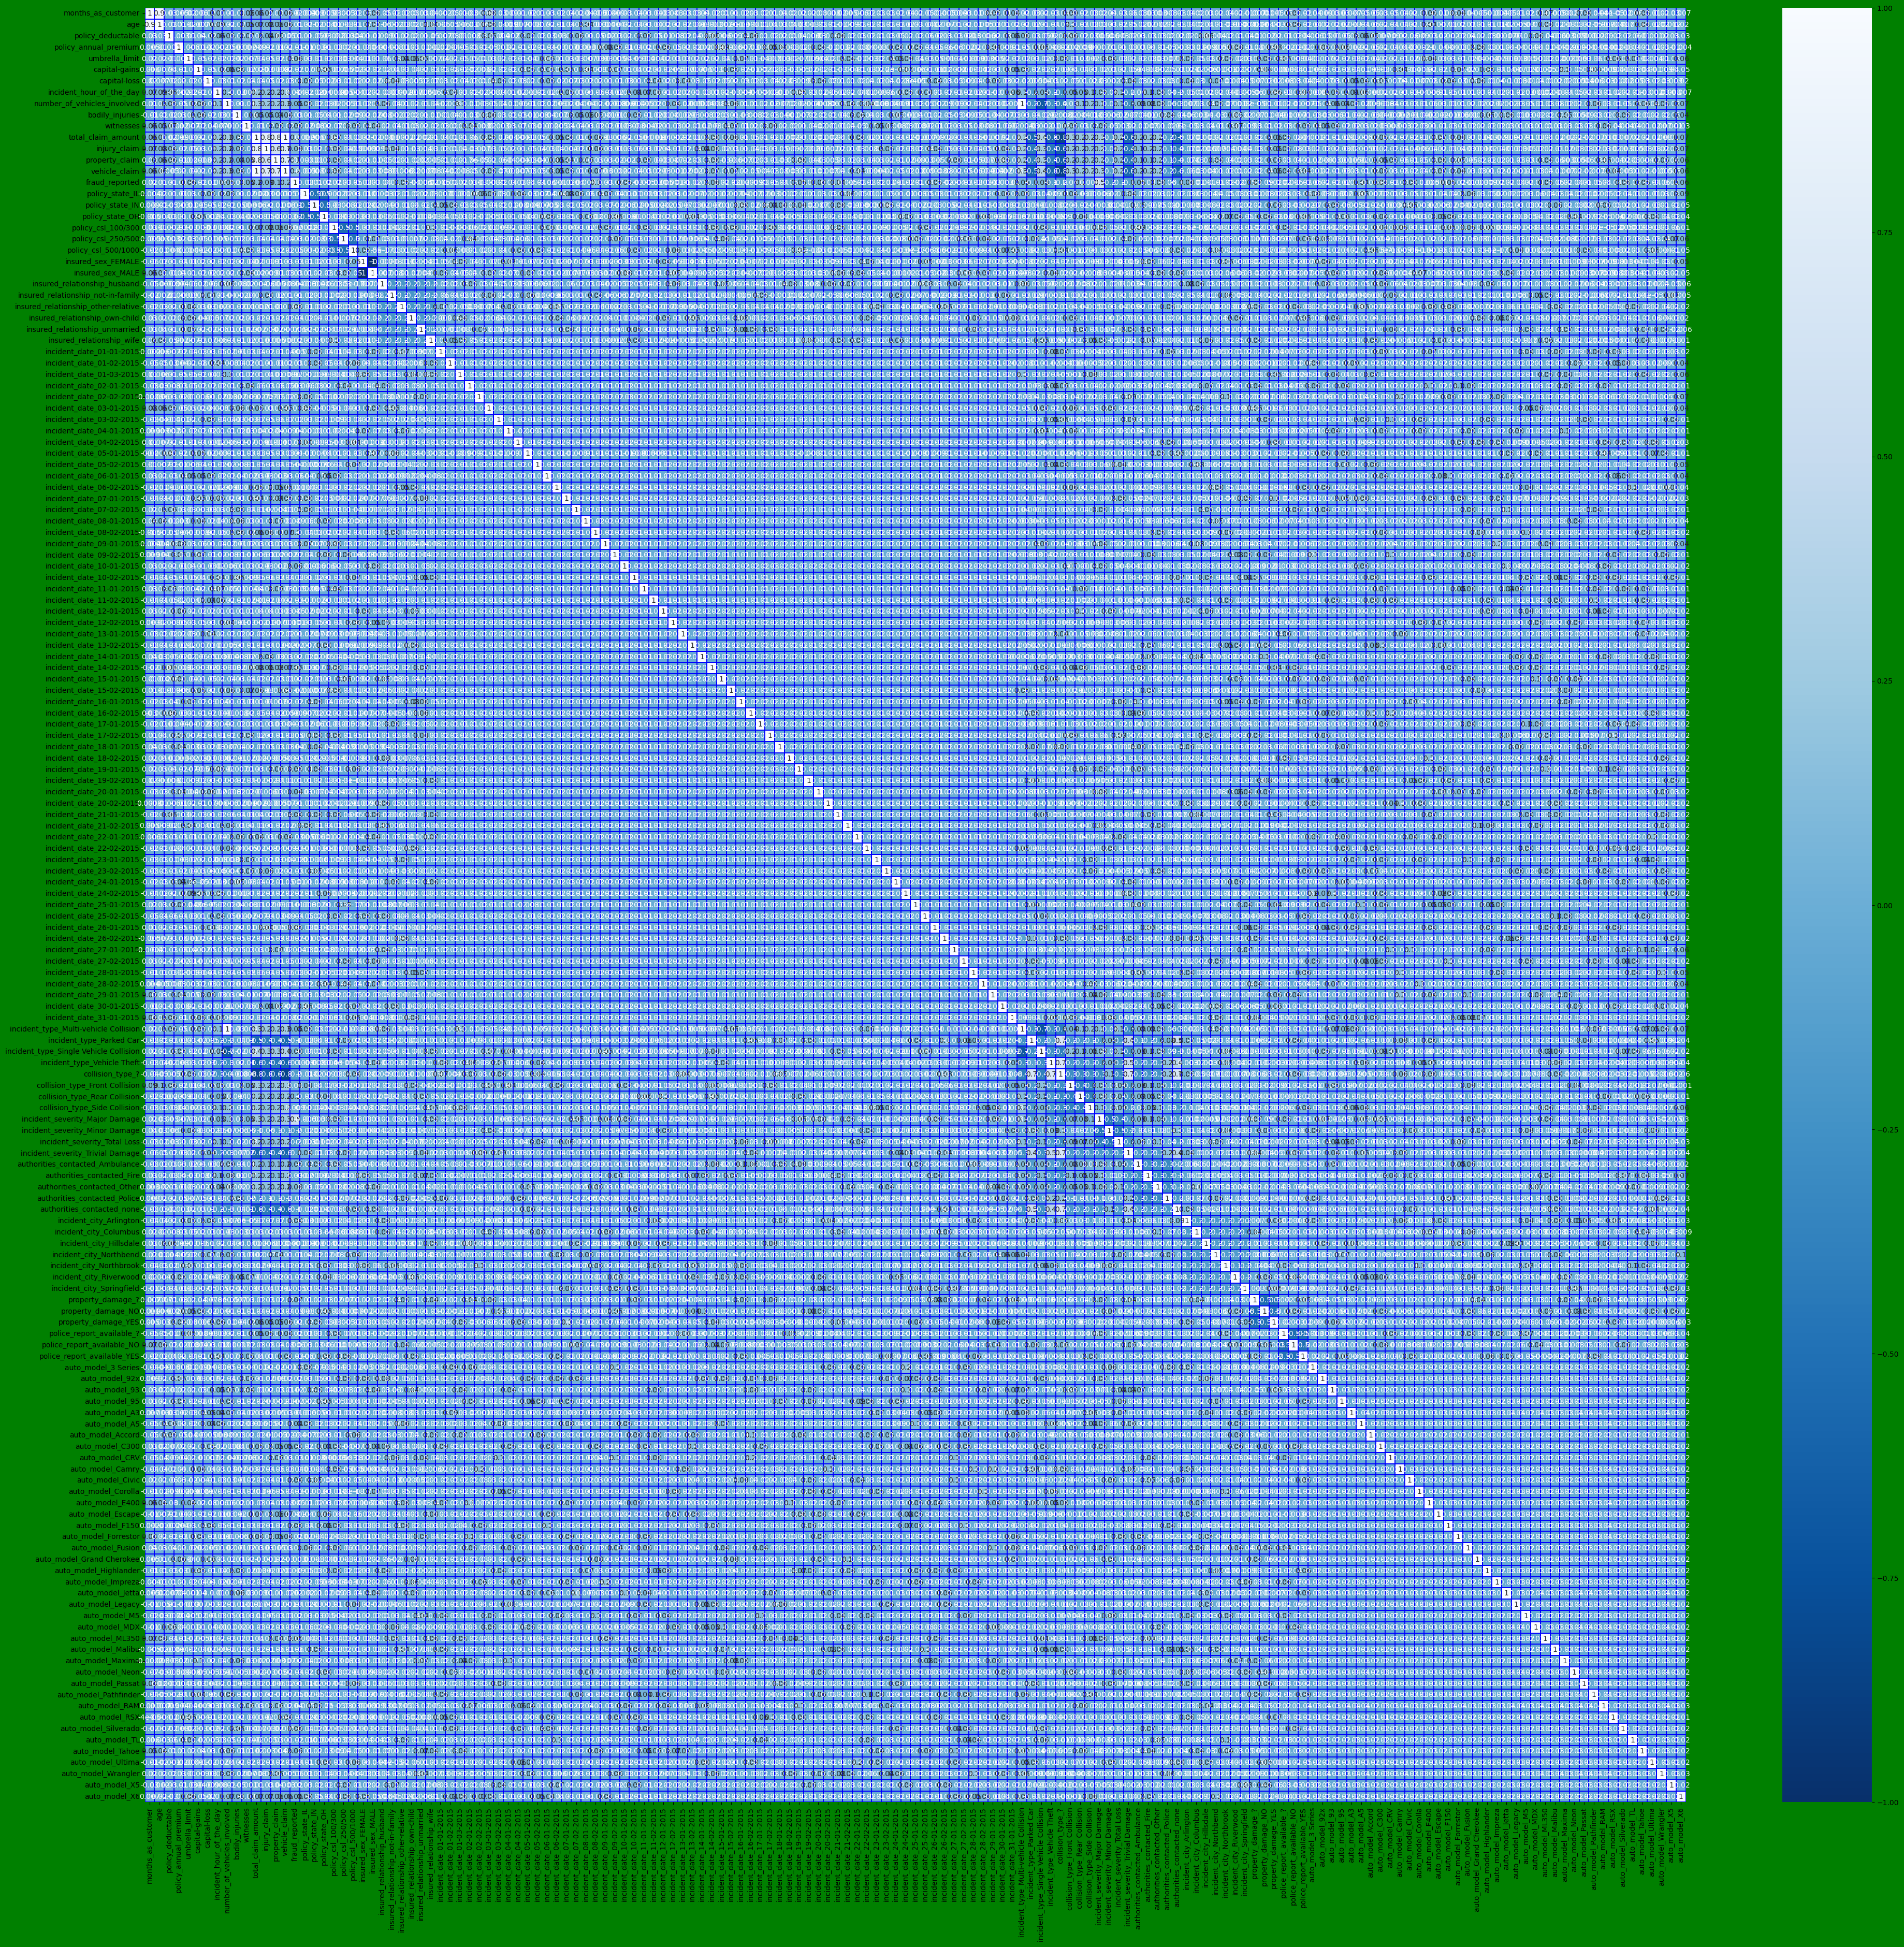

In [14]:
#we will use heatmap to check the multicollinearity
plt.figure(figsize=(48,45), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'b', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

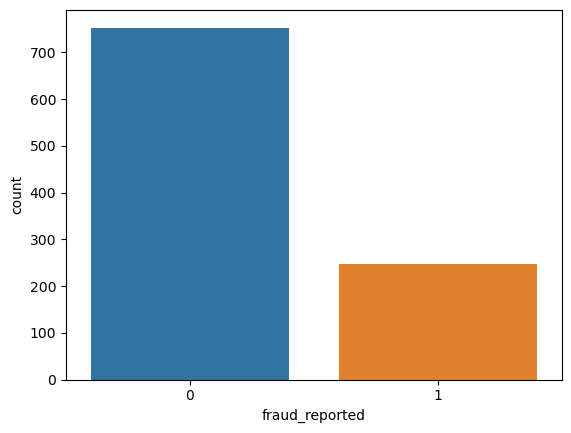

In [15]:
sns.countplot(x='fraud_reported', data=data)
plt.show()
#as per the analysis there are less no of fraud reported

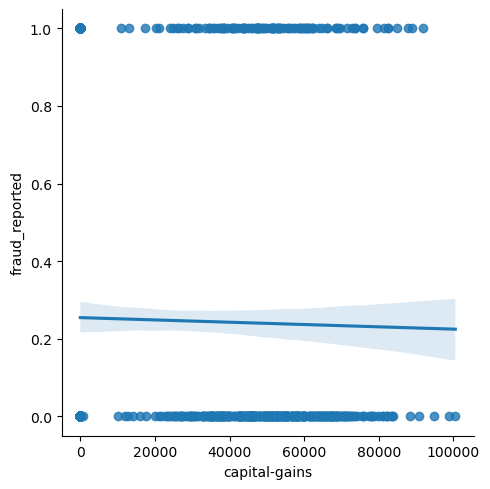

In [16]:
sns.lmplot(x='capital-gains',y='fraud_reported',data=data,palette='colorblind')


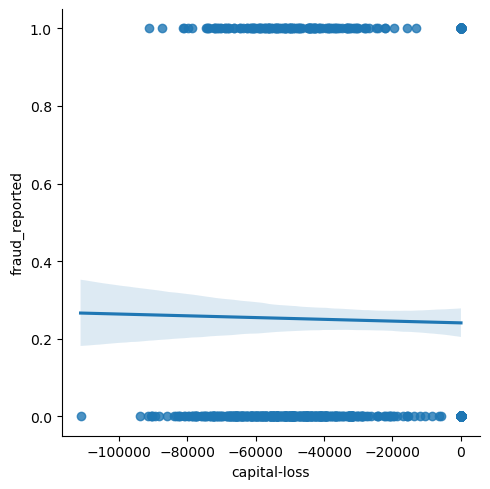

In [17]:
sns.lmplot(x='capital-loss',y='fraud_reported',data=data,palette='colorblind')


In [18]:
#splitting the data into feature and target variable

y = data['fraud_reported']
x = data.drop(columns = ['fraud_reported'])

In [19]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # We are able to tackle the issue of biasness through standard scalar method


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [21]:
#splitting the data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 40)


In [22]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier


In [23]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)

ExtraTreesClassifier()

In [24]:
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))


0.78
[[204  12]
 [ 54  30]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       216
           1       0.71      0.36      0.48        84

    accuracy                           0.78       300
   macro avg       0.75      0.65      0.67       300
weighted avg       0.77      0.78      0.75       300



In [25]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)


RandomForestClassifier()

In [26]:
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7533333333333333
[[210   6]
 [ 68  16]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       216
           1       0.73      0.19      0.30        84

    accuracy                           0.75       300
   macro avg       0.74      0.58      0.58       300
weighted avg       0.75      0.75      0.70       300



In [27]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
from xgboost import XGBClassifier


In [29]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
predXGB=XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.7466666666666667
[[194  22]
 [ 54  30]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       216
           1       0.58      0.36      0.44        84

    accuracy                           0.75       300
   macro avg       0.68      0.63      0.64       300
weighted avg       0.72      0.75      0.73       300



In [32]:
import joblib
joblib.dump(ET, 'Insurance_fraud.pkl') #saving the model


['Insurance_fraud.pkl']

In [34]:
ET = joblib.load('Insurance_fraud.pkl')

prediction = ET.predict(x_test)
prediction


array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [35]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a              
data


Predicted  Actual
0            0       0
1            0       1
2            1       0
3            0       0
4            0       1
..         ...     ...
295          0       0
296          0       0
297          0       0
298          0       0
299          1       0

[300 rows x 2 columns]